In [1]:
import pickle
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [4]:
import csv

In [5]:
 import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

## Loading data  for training and testing

In [6]:
file = open('/home/ridha/Downloads/train_label.pkl','rb')
train_label=pickle.load(file)

In [7]:
print(train_label)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [8]:
file = open('/home/ridha/Downloads/test_image.pkl','rb')
test_image=pickle.load(file)

In [9]:
file = open('/home/ridha/Downloads/train_image.pkl','rb')
train_image=pickle.load(file)

In [10]:
print(train_image[0])

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 41, 188, 103, 54, 48, 43, 87, 168, 133, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 49, 136, 219, 216, 228, 236, 255, 255, 255, 255, 217, 215, 254, 231, 160, 45, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 176, 222, 224, 212, 203, 198, 196, 200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164, 0, 0, 0, 0, 0, 0, 0, 0, 0, 188, 219, 200, 198, 202, 198, 199, 199, 201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225, 41, 0, 0, 0, 0, 0, 0, 0, 51, 219, 199, 203, 203, 212, 238, 248, 250, 245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140, 0, 0, 0, 0, 0, 0, 0, 116, 226, 206, 204, 207, 204, 101, 75, 47, 73, 48, 50, 45, 51, 63, 113, 222, 202, 206, 220, 224, 0, 0, 0, 0, 0, 0, 0, 200, 222, 209, 203, 215, 200, 0, 70, 98, 0, 103, 59, 68, 71, 49, 0, 219, 206, 214, 210, 250, 38, 0, 0, 0, 0, 0, 0, 247, 218, 212, 210, 215, 214, 0, 254, 243, 139, 255, 174, 251, 255, 205, 0, 215, 217, 214, 208, 220, 95, 0, 0, 0, 0, 0, 45, 226, 214, 214, 215, 224, 205, 0, 42, 35, 60, 16, 

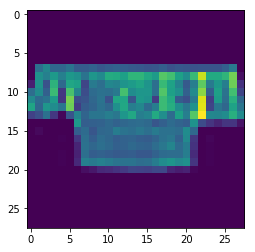

In [11]:
import numpy as np
img=np.array(train_image[20])
img=img.reshape(28,28)
plt.imshow(img)


## creating the function to normalize pixel value by 255.0

In [12]:
def mnistNormalize(train_image):
    train_image/=255.0
    return train_image

In [13]:
train_image=np.array(train_image).astype(np.float32)
train_image=mnistNormalize(train_image)

## Creating train and validation test with a split of 30%

In [14]:
X_train, X_val, y_train, y_val=train_test_split(train_image, train_label, test_size=0.30, random_state=42, shuffle=True)

## Checking Logistic regression for with L1 norm

In [15]:
logistic1 = LogisticRegression(multi_class='ovr', penalty='l1',C=1)
logistic1.fit(X_train,y_train)

/home/ridha/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Checking Logistic regression for with L2 norm

In [16]:
logistic2 = LogisticRegression(multi_class='ovr', penalty='l2',C=1)
logistic2.fit(X_train,y_train)

/home/ridha/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Getting results for train and val set with logistics L1 and L2 norm

In [17]:
result1=logistic1.predict(X_train)
result2=logistic1.predict(X_val)
result3=logistic2.predict(X_train)
result4=logistic2.predict(X_val)

In [18]:
def classwise(y_true, y_pred):
    return classification_report(y_true, y_pred)

In [19]:
def plotConfusionMatrix(y_true, y_pred):
    matrix=confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(matrix)
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)

In [20]:
def Accuracy(y_true, y_pred):
    accuracy = accuracy_score(y_pred, y_true)
    return accuracy


## train  and validation accuracy with l1 norm

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1354
           2       0.88      0.90      0.89      1440
           3       0.93      0.94      0.94      1400
           6       0.81      0.76      0.78      1406

   micro avg       0.87      0.87      0.87      5600
   macro avg       0.87      0.87      0.87      5600
weighted avg       0.87      0.87      0.87      5600

0.8682142857142857


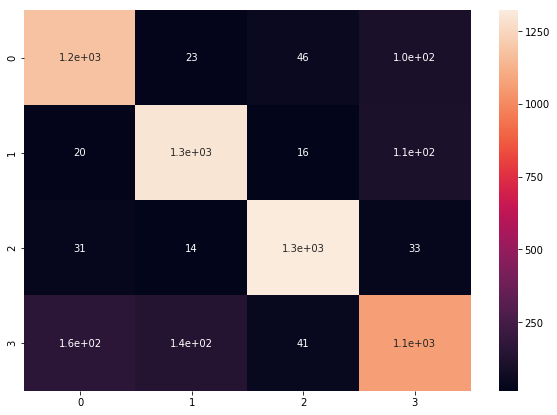

In [21]:
#train accuracy with l1
print(classwise(y_train, result1))
print(Accuracy(y_train, result1))
plotConfusionMatrix(y_train, result1)

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       646
           2       0.78      0.84      0.81       560
           3       0.89      0.89      0.89       600
           6       0.70      0.64      0.66       594

   micro avg       0.80      0.80      0.80      2400
   macro avg       0.79      0.80      0.80      2400
weighted avg       0.80      0.80      0.80      2400

0.7975


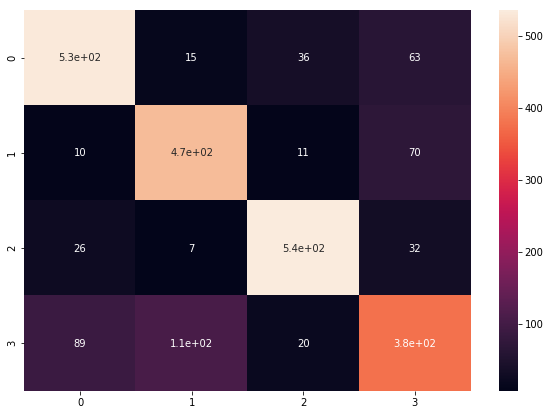

In [22]:
#validation accuracy with l1
print(classwise(y_val, result2))
print(Accuracy(y_val, result2))
plotConfusionMatrix(y_val, result2)

## train  and validation accuracy with l2 norm

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1354
           2       0.89      0.91      0.90      1440
           3       0.94      0.95      0.95      1400
           6       0.84      0.78      0.81      1406

   micro avg       0.89      0.89      0.89      5600
   macro avg       0.88      0.89      0.88      5600
weighted avg       0.88      0.89      0.88      5600

0.8853571428571428


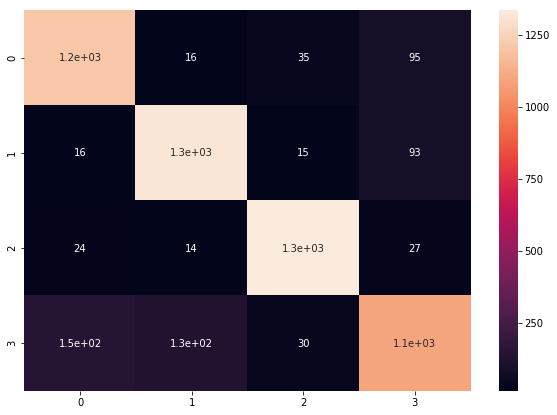

In [23]:
#train accuracy with l2
print(classwise(y_train, result3))
print(Accuracy(y_train, result3))
plotConfusionMatrix(y_train, result3)

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       646
           2       0.77      0.84      0.80       560
           3       0.88      0.88      0.88       600
           6       0.69      0.62      0.65       594

   micro avg       0.79      0.79      0.79      2400
   macro avg       0.79      0.79      0.79      2400
weighted avg       0.79      0.79      0.79      2400

0.7904166666666667


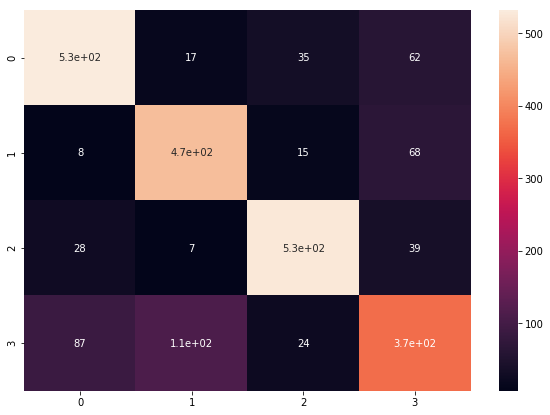

In [24]:
#validation accuracy with l2
print(classwise(y_val, result4))
print(Accuracy(y_val, result4))
plotConfusionMatrix(y_val, result4)

## Writing data image_index and class to the  csv file

In [34]:
def write_to_file(text):
    with open("Ridha_Juneja.csv", "w") as f:
        writer = csv.writer(f)
        writer.writerows(text)

In [35]:
result= logistic1.predict(test_image)

In [36]:
text=[]
text.append(['image_index','class'])
for index,label in enumerate(result):
    text.append([index,label])

In [37]:
write_to_file(text)

In [38]:
import pandas as pd
data=pd.read_csv('/home/ridha/Ridha_Juneja.csv')

In [39]:
data[:10]

,image_index,class
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
5,5,0
6,6,0
7,7,0
8,8,0
9,9,0
